Number of nodes: 834
Number of edges: 4721


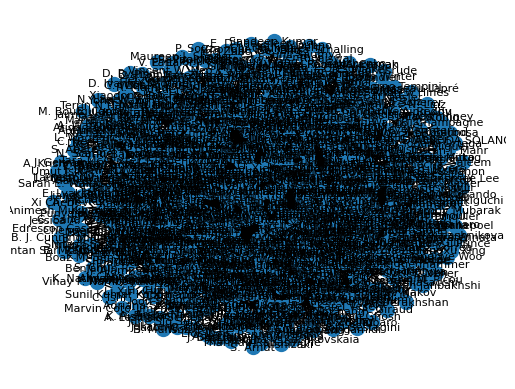

In [1]:
import csv
import networkx as nx

# Read CSV file and extract author names
filename = '../result4.csv'
authors = {}
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for author in author_list:
            author = author.strip()  # remove leading/trailing white space
            if author not in authors:
                authors[author] = 1
            else:
                authors[author] += 1

# Create graph and add nodes for authors with > 10 co-occurrences
G = nx.Graph()
for author, count in authors.items():
    if count > 10:
        G.add_node(author)

# Add edges for co-occurrences between authors with > 10 co-occurrences
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for i in range(len(author_list)):
            author_i = author_list[i].strip()
            if author_i in G.nodes():
                for j in range(i+1, len(author_list)):
                    author_j = author_list[j].strip()
                    if author_j in G.nodes():
                        if G.has_edge(author_i, author_j):
                            G[author_i][author_j]['weight'] += 1
                        else:
                            G.add_edge(author_i, author_j, weight=1)

# Print network information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw network using networkx
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()


In [2]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Read CSV file and extract star names
filename = 'result.csv'
df = pd.read_csv(filename)
edges = []
nodes = []
for i in range(0, len(df)):
    try:
        this_star_list = df['Author Name'][i].split(',')
        if len(this_star_list) >= 2:
            nodes += this_star_list
            for m in range(len(this_star_list)):
                for n in range(m + 1, len(this_star_list)):
                    edges.append((this_star_list[m], this_star_list[n]))
    except:
        pass

# Create graph and layout
G = nx.Graph(edges)
pos = nx.kamada_kawai_layout(G)

# Create edge trace
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node trace
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0]) + ': ' + str(len(adjacencies[1])) + ' co-occurrences')
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color=node_adjacencies,
        colorscale='Bluered',
        reversescale=True,
        colorbar=dict(
            thickness=15,
            title='Star Co-occurrences',
            xanchor='left',
            titleside='right',
        ),
        line_width=0))
    
node_trace.text = node_text   

# Create figure and layout
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Co-occurrence Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                plot_bgcolor='rgba(0,0,0,0)',
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show figure
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'result.csv'